# part 3 and 4

## part 3

1. Explain in your own words: What is the the difference between the html page and the wiki-source?

The wiki-source is data how the wiki page is written. It is nicer than raw data, it has text blocks and you can acces pure text, where the html page just has the raw text (how the page is build with all blocks and no organisation

2. What are the various parameters you can set for a query of the wikipedia api?

there are many parameters explained [here](https://www.mediawiki.org/wiki/API:Parsing_wikitext) but for examle:
* action
* page
* format
* content



In [13]:
import urllib
import json

In [19]:
base_url = "https://en.wikipedia.org/w/api.php"
pages = ["Technical_University_of_Denmark","Swimming","Slovenia","Skiing"]

Data = list()

for i in pages:
    params ="?"+"&action=parse"+"&page={0}".format(i)+"&format=json"
    url = base_url+params
    print(url)
    data = urllib.request.urlopen(url).read()
    data = json.loads(data)
    Data.append(data)

https://en.wikipedia.org/w/api.php?&action=parse&page=Technical_University_of_Denmark&format=json
https://en.wikipedia.org/w/api.php?&action=parse&page=Swimming&format=json
https://en.wikipedia.org/w/api.php?&action=parse&page=Slovenia&format=json
https://en.wikipedia.org/w/api.php?&action=parse&page=Skiing&format=json


## part 4 

This is the NetworkX part of course

### Undirected graphs

In [21]:
import networkx as nx

G = nx.Graph()

In [22]:
G.add_node(1)
G.add_nodes_from([2,3,4])

In [23]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [28]:
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e)

In [30]:
G.add_edges_from([(1,3),(1,4)])

In [31]:
G.add_edges_from(H.edges)

In [32]:
G.number_of_nodes()

10

In [33]:
list(G.nodes)

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
list(H.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
list(G.edges)

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 0),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9)]

In [36]:
list(G.neighbors(1))

[2, 3, 4, 0]

In [39]:
print(G[1])
print(G.neighbors(1))

{2: {}, 3: {}, 4: {}, 0: {}}


In [40]:
G[1][2]

{}

In [42]:
G.add_node((1,"black"))

In [43]:
G

In [44]:
list(G.nodes)

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9, (1, 'black')]

In [45]:
G.remove_node((1,"black"))

In [46]:
list(G.nodes)

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9]

In [47]:
G[1][2]["color"] = "black"

In [48]:
print(G.edges)

[(1, 2), (1, 3), (1, 4), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


In [49]:
print(G.nodes)

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9]


In [51]:
G[1]

AtlasView({2: {'color': 'black'}, 3: {}, 4: {}, 0: {}})

In [52]:
print(G.nodes.data())

[(1, {}), (0, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {})]


In [53]:
print(G.edges.data())

[(1, 2, {'color': 'black'}), (1, 3, {}), (1, 4, {}), (1, 0, {}), (2, 3, {}), (3, 4, {}), (4, 5, {}), (5, 6, {}), (6, 7, {}), (7, 8, {}), (8, 9, {})]


In [54]:
# Node atributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 0: {}, 2: {}, 3: {'time': '2pm'}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

In [56]:
# edge atributes
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print(G.edges.data())

[(1, 2, {'color': 'blue', 'weight': 4.7}), (1, 3, {}), (1, 4, {}), (1, 0, {}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red', 'weight': 4.2}), (4, 5, {'color': 'red'}), (5, 6, {}), (6, 7, {}), (7, 8, {}), (8, 9, {})]


### Directed graphs

In [65]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

DG.degree(1, weight='weight')

print(list(DG.successors(1)))

print(list(DG.neighbors(1)))

[2]
[2]


In [58]:
list(DG.nodes)

[1, 2, 3]

In [59]:
list(DG.neighbors(2))

[]

In [61]:
list(DG.successors(2))

[]

In [62]:
UDG = DG.to_undirected()

In [66]:
list(UDG.neighbors(1))

[2, 3]

In [64]:
list(UDG.nodes)

[1, 2, 3]

### MultiGraphs

In [67]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

### Drawing graphs

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/lukaavbreht/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


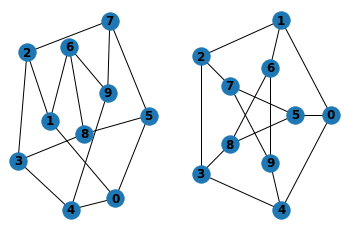

In [69]:
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')